In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

from sklearn.linear_model import Lasso as skLasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

import pysindy as ps
from PDE_FIND import *
%matplotlib widget

In [2]:
def odefunc(u, t):
    dudt = np.zeros(u.shape)
    
    nx = u.shape[0]
    
    dudt[0] = 0 # insulated boundary condition
    dudt[-1] = 0
    
    for i in range(1, nx-1):
        dudt[i] = -c * (u[i] - u[i - 1]) / dx

    return dudt

In [3]:
tf = 0.625 #nt*dt

nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
#nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

t = np.arange(0, tf, dt)

In [4]:
u = np.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
U1 = odeint(odefunc, u, t)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
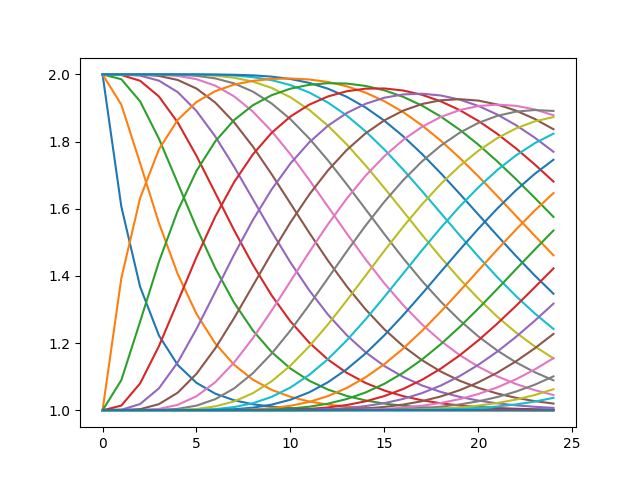

In [6]:
plt.plot(U1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
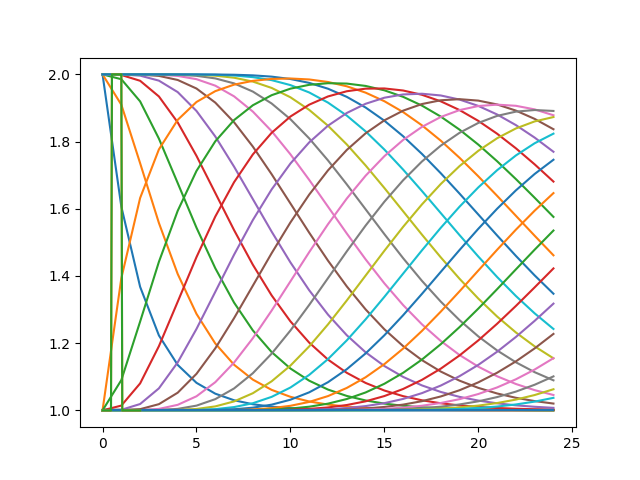

In [15]:
plt.plot(np.linspace(0,2, nx), u)
plt.show()